# Search and Download Sentinel 2 imagery using Sentinelsat API

### Import libraries

In [ ]:
!pip install geopandas
!pip install sentinelsat

     |████████████████████████████████| 994 kB 5.2 MB/s 
     |████████████████████████████████| 15.4 MB 38 kB/s 
     |████████████████████████████████| 6.3 MB 51.2 MB/s 
     |████████████████████████████████| 48 kB 2.6 MB/s 


In [ ]:
import numpy as np
import geopandas as gpd
import folium
from sentinelsat.sentinel import SentinelAPI, read_geojson, geojson_to_wkt
import matplotlib.pyplot as plt

### Plot a boundary in WGS 84 EPSG code 4326 on a folium slipping map

In [ ]:
m = folium.Map([-13.2512161, 34.3015278], zoom_start=10)
boundsdata = '/content/map (5).geojson'
folium.GeoJson(boundsdata).add_to(m)
m

### Connect to the API using a username and password - if you don't have these set one up on scihub

In [ ]:
# connect to the API
user = 'muhammadnassermoul' ## change this!
password = 'Casedepart1994' ## change this!

api = SentinelAPI(user, password, 'https://scihub.copernicus.eu/dhus')

In [ ]:
# search by polygon
footprint = geojson_to_wkt(read_geojson(boundsdata))

print (footprint)

GEOMETRYCOLLECTION(POLYGON((32.2998 -17.3087,36.3428 -17.3087,36.3428 -8.9285,32.2998 -8.9285,32.2998 -17.3087)))


### Search
Search for images that fall with the date range 21st Nov 2019 - 3rd Nov 2019, we want sentinel 2 level2A and cloud cover of 0-20%

In [ ]:
products = api.query(footprint,
                     date = ('20191101', '20191103'),
                     platformname = 'Sentinel-2',
                     processinglevel = 'Level-2A',
                     cloudcoverpercentage = (0, 20))

In [ ]:
print(len(products))

7


Show results in a table

In [ ]:
api.to_geodataframe(products)

,title,link,link_alternative,link_icon,summary,ondemand,beginposition,endposition,ingestiondate,orbitnumber,relativeorbitnumber,cloudcoverpercentage,highprobacloudspercentage,mediumprobacloudspercentage,snowicepercentage,vegetationpercentage,waterpercentage,notvegetatedpercentage,unclassifiedpercentage,format,instrumentshortname,instrumentname,s2datatakeid,platformidentifier,orbitdirection,platformserialidentifier,processingbaseline,processinglevel,producttype,platformname,size,filename,level1cpdiidentifier,identifier,uuid,geometry
2f349d34-2f3e-44fa-9301-b03521b18e49,S2A_MSIL2A_20191102T073051_N0213_R049_T37LBD_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2019-11-02T07:30:51.024Z, Instrument: MS...",false,2019-11-02 07:30:51.024,2019-11-02 07:30:51.024,2019-11-02 13:41:05.870,22783,49,1.762791,1.318383,0.443947,0.0,12.509152,0.001019,84.752095,0.595064,SAFE,MSI,Multi-Spectral Instrument,GS2A_20191102T073051_022783_N02.13,2015-028A,DESCENDING,Sentinel-2A,02.13,Level-2A,S2MSI2A,Sentinel-2,1.09 GB,S2A_MSIL2A_20191102T073051_N0213_R049_T37LBD_2...,S2A_OPER_MSI_L1C_TL_SGS__20191102T092933_A0227...,S2A_MSIL2A_20191102T073051_N0213_R049_T37LBD_2...,2f349d34-2f3e-44fa-9301-b03521b18e49,"MULTIPOLYGON (((37.22705 -15.45792, 37.23519 -..."
35dcc450-7953-4663-b572-fb48676f8e6c,S2A_MSIL2A_20191102T073051_N0213_R049_T37LBE_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2019-11-02T07:30:51.024Z, Instrument: MS...",false,2019-11-02 07:30:51.024,2019-11-02 07:30:51.024,2019-11-02 13:41:05.385,22783,49,0.552337,0.301323,0.250474,0.0,39.714083,0.000607,58.291382,0.722516,SAFE,MSI,Multi-Spectral Instrument,GS2A_20191102T073051_022783_N02.13,2015-028A,DESCENDING,Sentinel-2A,02.13,Level-2A,S2MSI2A,Sentinel-2,1.10 GB,S2A_MSIL2A_20191102T073051_N0213_R049_T37LBE_2...,S2A_OPER_MSI_L1C_TL_SGS__20191102T092933_A0227...,S2A_MSIL2A_20191102T073051_N0213_R049_T37LBE_2...,35dcc450-7953-4663-b572-fb48676f8e6c,"MULTIPOLYGON (((37.23448 -14.55460, 37.24208 -..."
7d26572f-2ec9-4d9f-a591-e308f104c6c1,S2A_MSIL2A_20191102T073051_N0213_R049_T36LZJ_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2019-11-02T07:30:51.024Z, Instrument: MS...",false,2019-11-02 07:30:51.024,2019-11-02 07:30:51.024,2019-11-02 13:37:16.711,22783,49,0.096947,0.048560,0.047767,0.0,12.787436,1.854354,84.204769,0.422341,SAFE,MSI,Multi-Spectral Instrument,GS2A_20191102T073051_022783_N02.13,2015-028A,DESCENDING,Sentinel-2A,02.13,Level-2A,S2MSI2A,Sentinel-2,1.08 GB,S2A_MSIL2A_20191102T073051_N0213_R049_T36LZJ_2...,S2A_OPER_MSI_L1C_TL_SGS__20191102T092933_A0227...,S2A_MSIL2A_20191102T073051_N0213_R049_T36LZJ_2...,7d26572f-2ec9-4d9f-a591-e308f104c6c1,"MULTIPOLYGON (((35.79526 -15.44739, 36.81698 -..."
24488501-29cc-44d2-bf1c-99d4fde96d52,S2A_MSIL2A_20191102T073051_N0213_R049_T36LZK_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2019-11-02T07:30:51.024Z, Instrument: MS...",false,2019-11-02 07:30:51.024,2019-11-02 07:30:51.024,2019-11-02 13:37:09.918,22783,49,0.654308,0.351396,0.302391,0.0,38.693711,0.305510,58.398849,0.987608,SAFE,MSI,Multi-Spectral Instrument,GS2A_20191102T073051_022783_N02.13,2015-028A,DESCENDING,Sentinel-2A,02.13,Level-2A,S2MSI2A,Sentinel-2,1.07 GB,S2A_MSIL2A_20191102T073051_N0213_R049_T36LZK_2...,S2A_OPER_MSI_L1C_TL_SGS__20191102T092933_A0227...,S2A_MSIL2A_20191102T073051_N0213_R049_T36LZK_2...,24488501-29cc-44d2-bf1c-99d4fde96d52,"MULTIPOLYGON (((35.78355 -14.54470, 36.80101 -..."
977a65fe-c104-4c43-aaa4-fba967bc7258,S2A_MSIL2A_20191102T073051_N0213_R049_T36LYH_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://s

 **We get a dictionary of all products available in this period with the query specification. In this case, we receive only 6 images taken but you can tweak the query for your use case example expanding the time period or increasing the cloud coverage percentage.
From here we can create a GeodataFrame or Dataframe from the product dictionary and sort them according to cloud coverage percentage. I prefer GeodataFrame instead of plain dataframe as the first holds the geometry of each satellite image tile. Once we create the GeodataFrame and sort it. As we do not have many products here we call directly products_gdf_sorted table to see the attributes off all 6 rows.**

In [ ]:
products_gdf = api.to_geodataframe(products)
products_gdf_sorted = products_gdf.sort_values(['cloudcoverpercentage'], ascending=[True])
products_gdf_sorted

,title,link,link_alternative,link_icon,summary,ondemand,beginposition,endposition,ingestiondate,orbitnumber,relativeorbitnumber,cloudcoverpercentage,highprobacloudspercentage,mediumprobacloudspercentage,snowicepercentage,vegetationpercentage,waterpercentage,notvegetatedpercentage,unclassifiedpercentage,format,instrumentshortname,instrumentname,s2datatakeid,platformidentifier,orbitdirection,platformserialidentifier,processingbaseline,processinglevel,producttype,platformname,size,filename,level1cpdiidentifier,identifier,uuid,geometry
7d26572f-2ec9-4d9f-a591-e308f104c6c1,S2A_MSIL2A_20191102T073051_N0213_R049_T36LZJ_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2019-11-02T07:30:51.024Z, Instrument: MS...",false,2019-11-02 07:30:51.024,2019-11-02 07:30:51.024,2019-11-02 13:37:16.711,22783,49,0.096947,0.048560,0.047767,0.0,12.787436,1.854354,84.204769,0.422341,SAFE,MSI,Multi-Spectral Instrument,GS2A_20191102T073051_022783_N02.13,2015-028A,DESCENDING,Sentinel-2A,02.13,Level-2A,S2MSI2A,Sentinel-2,1.08 GB,S2A_MSIL2A_20191102T073051_N0213_R049_T36LZJ_2...,S2A_OPER_MSI_L1C_TL_SGS__20191102T092933_A0227...,S2A_MSIL2A_20191102T073051_N0213_R049_T36LZJ_2...,7d26572f-2ec9-4d9f-a591-e308f104c6c1,"MULTIPOLYGON (((35.79526 -15.44739, 36.81698 -..."
9667f52c-707f-4b7a-88ec-3b2798cfcc05,S2A_MSIL2A_20191102T073051_N0213_R049_T36LYK_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2019-11-02T07:30:51.024Z, Instrument: MS...",false,2019-11-02 07:30:51.024,2019-11-02 07:30:51.024,2019-11-02 13:36:36.806,22783,49,0.104683,0.019542,0.085141,0.0,27.076769,0.000110,72.387439,0.220897,SAFE,MSI,Multi-Spectral Instrument,GS2A_20191102T073051_022783_N02.13,2015-028A,DESCENDING,Sentinel-2A,02.13,Level-2A,S2MSI2A,Sentinel-2,442.10 MB,S2A_MSIL2A_20191102T073051_N0213_R049_T36LYK_2...,S2A_OPER_MSI_L1C_TL_SGS__20191102T092933_A0227...,S2A_MSIL2A_20191102T073051_N0213_R049_T36LYK_2...,9667f52c-707f-4b7a-88ec-3b2798cfcc05,"MULTIPOLYGON (((35.38282 -14.54857, 35.87422 -..."
35dcc450-7953-4663-b572-fb48676f8e6c,S2A_MSIL2A_20191102T073051_N0213_R049_T37LBE_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2019-11-02T07:30:51.024Z, Instrument: MS...",false,2019-11-02 07:30:51.024,2019-11-02 07:30:51.024,2019-11-02 13:41:05.385,22783,49,0.552337,0.301323,0.250474,0.0,39.714083,0.000607,58.291382,0.722516,SAFE,MSI,Multi-Spectral Instrument,GS2A_20191102T073051_022783_N02.13,2015-028A,DESCENDING,Sentinel-2A,02.13,Level-2A,S2MSI2A,Sentinel-2,1.10 GB,S2A_MSIL2A_20191102T073051_N0213_R049_T37LBE_2...,S2A_OPER_MSI_L1C_TL_SGS__20191102T092933_A0227...,S2A_MSIL2A_20191102T073051_N0213_R049_T37LBE_2...,35dcc450-7953-4663-b572-fb48676f8e6c,"MULTIPOLYGON (((37.23448 -14.55460, 37.24208 -..."
24488501-29cc-44d2-bf1c-99d4fde96d52,S2A_MSIL2A_20191102T073051_N0213_R049_T36LZK_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2019-11-02T07:30:51.024Z, Instrument: MS...",false,2019-11-02 07:30:51.024,2019-11-02 07:30:51.024,2019-11-02 13:37:09.918,22783,49,0.654308,0.351396,0.302391,0.0,38.693711,0.305510,58.398849,0.987608,SAFE,MSI,Multi-Spectral Instrument,GS2A_20191102T073051_022783_N02.13,2015-028A,DESCENDING,Sentinel-2A,02.13,Level-2A,S2MSI2A,Sentinel-2,1.07 GB,S2A_MSIL2A_20191102T073051_N0213_R049_T36LZK_2...,S2A_OPER_MSI_L1C_TL_SGS__20191102T092933_A0227...,S2A_MSIL2A_20191102T073051_N0213_R049_T36LZK_2...,24488501-29cc-44d2-bf1c-99d4fde96d52,"MULTIPOLYGON (((35.78355 -14.54470, 36.80101 -..."
2f349d34-2f3e-44fa-9301-b03521b18e49,S2A_MSIL2A_20191102T073051_N0213_R049_T37LBD_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https:/

**Let us say we are interested in the first satellite image since this has the least cloud coverage of all available images. we can simply call download and provide the product name (Note that you can download all images at once with api.download_all() function).**

Plot the table as a GeoPandas dataframe, based on the uuid field

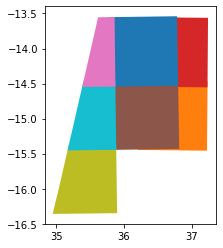

In [ ]:
areas = api.to_geodataframe(products)
areas.plot(column='uuid', cmap=None)

In [ ]:
areas.uuid

2f349d34-2f3e-44fa-9301-b03521b18e49    2f349d34-2f3e-44fa-9301-b03521b18e49
35dcc450-7953-4663-b572-fb48676f8e6c    35dcc450-7953-4663-b572-fb48676f8e6c
7d26572f-2ec9-4d9f-a591-e308f104c6c1    7d26572f-2ec9-4d9f-a591-e308f104c6c1
24488501-29cc-44d2-bf1c-99d4fde96d52    24488501-29cc-44d2-bf1c-99d4fde96d52
977a65fe-c104-4c43-aaa4-fba967bc7258    977a65fe-c104-4c43-aaa4-fba967bc7258
e81daff2-6708-4118-ba39-015e7dd47bb3    e81daff2-6708-4118-ba39-015e7dd47bb3
9667f52c-707f-4b7a-88ec-3b2798cfcc05    9667f52c-707f-4b7a-88ec-3b2798cfcc05
Name: uuid, dtype: object

Label these polygons

2f349d34-2f3e-44fa-9301-b03521b18e49    Annotation(36.721, -14.9571, '2f349d34-2f3e-44...
35dcc450-7953-4663-b572-fb48676f8e6c    Annotation(36.7302, -14.054, '35dcc450-7953-46...
7d26572f-2ec9-4d9f-a591-e308f104c6c1    Annotation(36.2985, -14.9446, '7d26572f-2ec9-4...
24488501-29cc-44d2-bf1c-99d4fde96d52    Annotation(36.2851, -14.0423, '24488501-29cc-4...
977a65fe-c104-4c43-aaa4-fba967bc7258    Annotation(35.4779, -15.8838, '977a65fe-c104-4...
e81daff2-6708-4118-ba39-015e7dd47bb3    Annotation(35.5789, -14.9884, 'e81daff2-6708-4...
9667f52c-707f-4b7a-88ec-3b2798cfcc05    Annotation(35.6783, -14.1055, '9667f52c-707f-4...
dtype: object

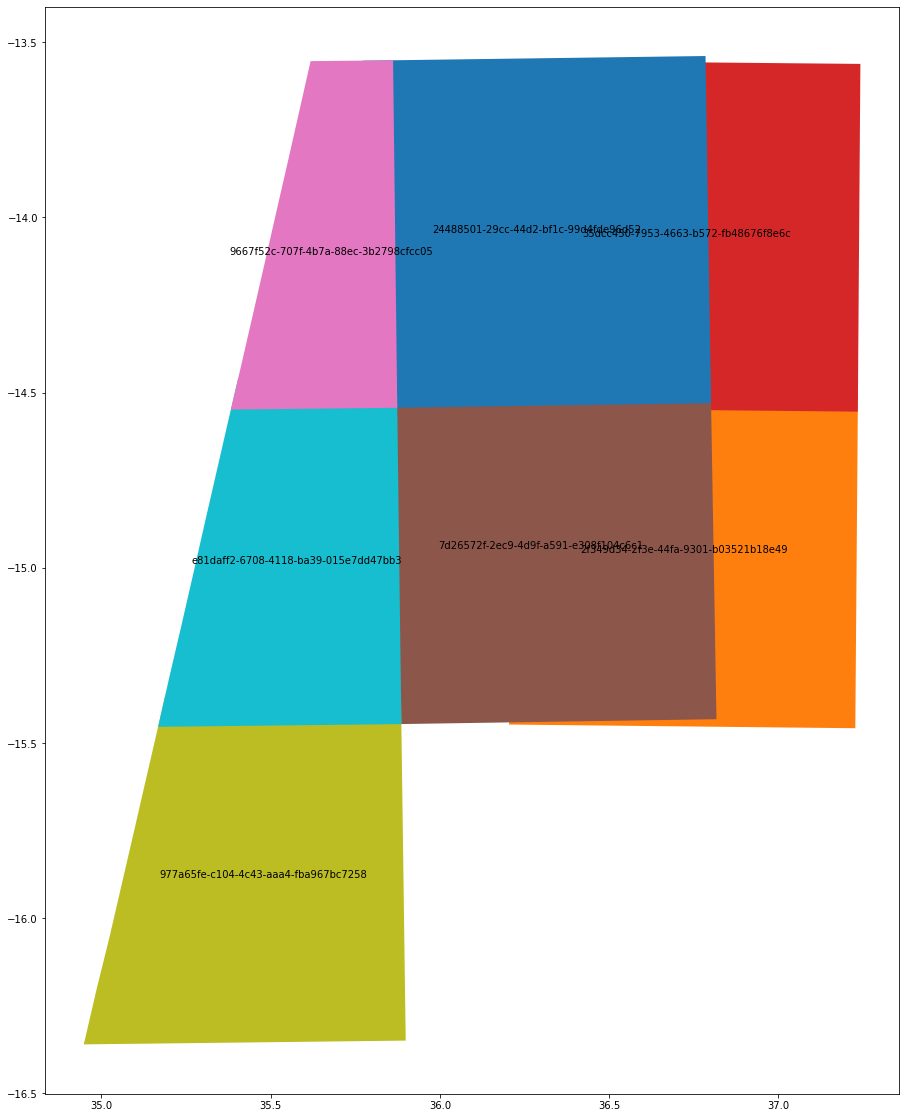

In [ ]:
ax = areas.plot(column='uuid', cmap=None, figsize=(20, 20))
areas.apply(lambda x: ax.annotate(s=x.uuid, xy=x.geometry.centroid.coords[0], ha='center'),axis=1)

### Inspect vs our bounds
use geopandas to check which scene to download

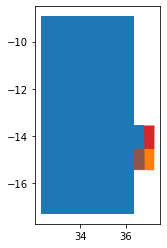

In [ ]:
gdf2 = gpd.read_file(boundsdata)
f, ax = plt.subplots(1)
areas.plot(ax=ax,column='uuid',cmap=None,)
gdf2.plot(ax=ax)
plt.show()

### Get the uuid and inspect produuct data

In [ ]:
#api.get_product_odata('bc60b9bf-3ca2-47d8-a2ba-ed4b6de3c44d	') The ids are rarely online
api.get_product_odata('bc60b9bf-3ca2-47d8-a2ba-ed4b6de3c44d')

{'Creation Date': datetime.datetime(2020, 1, 27, 12, 34, 13, 588000),
 'Ingestion Date': datetime.datetime(2020, 1, 27, 12, 33, 48, 814000),
 'Online': True,
 'date': datetime.datetime(2020, 1, 27, 7, 52, 1, 24000),
 'footprint': 'POLYGON((32.98702468105238 -15.376382299503966,32.96236353886404 -15.486374867425326,32.92844013341987 -15.634527051011018,32.89569702743394 -15.783139840325292,32.86210827042246 -15.931558548127036,32.82872516143443 -16.080058359718635,32.7953585371122 -16.228584530283236,32.76400555711949 -16.368568936406664,32.06327862993578 -16.367162517865648,32.06785271555545 -15.374646369465262,32.98702468105238 -15.376382299503966))',
 'id': 'bc60b9bf-3ca2-47d8-a2ba-ed4b6de3c44d',
 'md5': 'f1c018d8db46d70c76a4abda694888fe',
 'quicklook_url': "https://scihub.copernicus.eu/dhus/odata/v1/Products('bc60b9bf-3ca2-47d8-a2ba-ed4b6de3c44d')/Products('Quicklook')/$value",
 'size': 972388663,
 'title': 'S2A_MSIL2A_20200127T075201_N0213_R135_T36LVH_20200127T101244',
 'url': "htt

## Download the data

In [ ]:
api.download("bc60b9bf-3ca2-47d8-a2ba-ed4b6de3c44d")

MD5 checksumming:   0%|          | 0.00/972M [00:00<?, ?B/s]

{'Creation Date': datetime.datetime(2020, 1, 27, 12, 34, 13, 588000),
 'Ingestion Date': datetime.datetime(2020, 1, 27, 12, 33, 48, 814000),
 'Online': True,
 'date': datetime.datetime(2020, 1, 27, 7, 52, 1, 24000),
 'downloaded_bytes': 972388663,
 'footprint': 'POLYGON((32.98702468105238 -15.376382299503966,32.96236353886404 -15.486374867425326,32.92844013341987 -15.634527051011018,32.89569702743394 -15.783139840325292,32.86210827042246 -15.931558548127036,32.82872516143443 -16.080058359718635,32.7953585371122 -16.228584530283236,32.76400555711949 -16.368568936406664,32.06327862993578 -16.367162517865648,32.06785271555545 -15.374646369465262,32.98702468105238 -15.376382299503966))',
 'id': 'bc60b9bf-3ca2-47d8-a2ba-ed4b6de3c44d',
 'md5': 'f1c018d8db46d70c76a4abda694888fe',
 'path': 'S2A_MSIL2A_20200127T075201_N0213_R135_T36LVH_20200127T101244.zip',
 'quicklook_url': "https://scihub.copernicus.eu/dhus/odata/v1/Products('bc60b9bf-3ca2-47d8-a2ba-ed4b6de3c44d')/Products('Quicklook')/$value

In [ ]:
   pip install rasterio

     |████████████████████████████████| 19.3 MB 1.2 MB/s 


In [ ]:
import rasterio as rio
import zipfile

In [ ]:
!pwd
!ls

/content
'map (5).geojson'						    sample_data
 S2A_MSIL2A_20200127T075201_N0213_R135_T36KVG_20200127T101244.zip


In [ ]:
!unzip "/content/S2A_MSIL2A_20200127T075201_N0213_R135_T36LVH_20200127T101244.zip" -d "/content"

Archive:  /content/S2A_MSIL2A_20200127T075201_N0213_R135_T36LVH_20200127T101244.zip
   creating: /content/S2A_MSIL2A_20200127T075201_N0213_R135_T36LVH_20200127T101244.SAFE/
 extracting: /content/S2A_MSIL2A_20200127T075201_N0213_R135_T36LVH_20200127T101244.SAFE/INSPIRE.xml  
   creating: /content/S2A_MSIL2A_20200127T075201_N0213_R135_T36LVH_20200127T101244.SAFE/rep_info/
 extracting: /content/S2A_MSIL2A_20200127T075201_N0213_R135_T36LVH_20200127T101244.SAFE/rep_info/S2_PDI_Level-2A_Tile_Metadata.xsd  
 extracting: /content/S2A_MSIL2A_20200127T075201_N0213_R135_T36LVH_20200127T101244.SAFE/rep_info/S2_PDI_Level-2A_Datastrip_Metadata.xsd  
 extracting: /content/S2A_MSIL2A_20200127T075201_N0213_R135_T36LVH_20200127T101244.SAFE/rep_info/S2_User_Product_Level-2A_Metadata.xsd  
   creating: /content/S2A_MSIL2A_20200127T075201_N0213_R135_T36LVH_20200127T101244.SAFE/HTML/
 extracting: /content/S2A_MSIL2A_20200127T075201_N0213_R135_T36LVH_20200127T101244.SAFE/HTML/star_bg.jpg  
 extracting: /cont

In [ ]:
# Open Bands 4, 3 and 2 with Rasterio
R10 = '/content/S2A_MSIL2A_20200127T075201_N0213_R135_T36LVH_20200127T101244.SAFE/GRANULE/L2A_T36LVH_A024013_20200127T081349/IMG_DATA/R10m'
#b4 = rio.open(R10+'/T36LWK_20200127T075201_B02_20m.jp2')
b4 = rio.open("/content/S2A_MSIL2A_20200127T075201_N0213_R135_T36LVH_20200127T101244.SAFE/GRANULE/L2A_T36LVH_A024013_20200127T081349/IMG_DATA/R10m/T36LVH_20200127T075201_B02_10m.jp2")
#b3 = rio.open(R10+'/T36LWK_20200127T075201_B03_20m.jp2')
b3 = rio.open("/content/S2A_MSIL2A_20200127T075201_N0213_R135_T36LVH_20200127T101244.SAFE/GRANULE/L2A_T36LVH_A024013_20200127T081349/IMG_DATA/R10m/T36LVH_20200127T075201_B03_10m.jp2")
#b2 = rio.open(R10+'/T36LWK_20200127T075201_B05_20m.jp2')
b2 = rio.open("/content/S2A_MSIL2A_20200127T075201_N0213_R135_T36LVH_20200127T101244.SAFE/GRANULE/L2A_T36LVH_A024013_20200127T081349/IMG_DATA/R10m/T36LVH_20200127T075201_B04_10m.jp2")


# Create an RGB image 
with rio.open('RGB.tiff','w',driver='Gtiff', width=b4.width, height=b4.height, 
              count=3,crs=b4.crs,transform=b4.transform, dtype=b4.dtypes[0]) as rgb:
    rgb.write(b2.read(1),1) 
    rgb.write(b3.read(1),2) 
    rgb.write(b4.read(1),3) 
    rgb.close()

In [ ]:
import geopandas
import fiona
from shapely.geometry import Point

s = geopandas.GeoSeries([Point(4.42, 50.4), Point(4.43, 50.2)])

In [ ]:
s

0    POINT (4.42000 50.40000)
1    POINT (4.43000 50.20000)
dtype: geometry

In [ ]:
s.crs = {'init': 'epsg:4326', 'no_defs': True}

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [ ]:
s.crs

<Geographic 2D CRS: +init=epsg:4326 +no_defs +type=crs>
Name: WGS 84
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
s.to_crs(epsg=31370)

0    POINT (153643.920 121012.189)
1     POINT (154373.425 98766.948)
dtype: geometry

In [ ]:
s.to_crs(epsg=32633)

0    POINT (-251108.688 5636817.570)
1    POINT (-253582.809 5614550.241)
dtype: geometry

In [ ]:
 fiona.crs.from_epsg(4326)

AttributeError: ignored

In [ ]:
s = s.set_crs(epsg=4326)

In [ ]:
s

0    POINT (4.42000 50.40000)
1    POINT (4.43000 50.20000)
dtype: geometry

In [ ]:
#nReserve_proj = nReserve.to_crs({'init': 'epsg:32633'})
nReserve_proj = nReserve.set_crs('epsg:32633')


with rio.open("RGB.tiff") as src:
    out_image, out_transform = rio.mask.mask(src, nReserve_proj.geometry,crop=True)
    out_meta = src.meta.copy()
    out_meta.update({"driver": "GTiff",
                 "height": out_image.shape[1],
                 "width": out_image.shape[2],
                 "transform": out_transform})
    
with rasterio.open("RGB_masked.tif", "w", **out_meta) as dest:
    dest.write(out_image)

NameError: ignored

Unzip using code found on stackoverflow
<br>
<br>
https://stackoverflow.com/questions/3451111/unzipping-files-in-python

In [ ]:
import zipfile # https://stackoverflow.com/questions/3451111/unzipping-files-in-python
zip_ref = zipfile.ZipFile(path_tozip, 'r')
zip_ref.extractall(r'D:\sentinelsat')
zip_ref.close()

The data is now downloaded, and unzipped and waiting for you to work with it. There are plenty of things you can do with Satellite imagery for inspiration take a look at my website www.acgeospatial.co.uk

<br>
<br>
I offer training in Geospatial Python programming contact me info@acgeospatial.co.uk
